In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('/Users/neharana/Downloads/PRAMS_MCH_Indicators_2016_2021_Final - PRAMS_MCH_Indicators_2016_2021_merged_new (1).csv')

  We tried doing  linear and logistic regressions but their assumptions and limitations made them less suitable for complex, non-linear, and high-dimensional data typical in health-related datasets like this.

The model aims to understand and predict how various maternal and child health indicators influence the overall death rate. This can be useful for public health analysis and policy-making, as it helps identify key factors associated with higher mortality rates.

In this analysis, the role of the Gradient Boosting Machine (GBM) model is to provide a more sophisticated and potentially more accurate way of understanding and predicting the relationships between various factors and the death rate per 100,000 individuals.

A GBM model is a good fit for analyzing complex datasets like ours, which likely contains a mix of linear and non-linear relationships and various types of variables. The model's ability to provide insights into feature importance and its general robustness against overfitting make it a powerful tool for extracting meaningful insights from the dataset.

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Preprocessing the dataset
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Site Name'])

# Dropping rows with missing values in 'Deaths/100000'
data_encoded.dropna(subset=['Deaths/100000'], inplace=True)

# Handling other missing values by filling with the mean (simple approach)
data_encoded.fillna(data_encoded.mean(), inplace=True)

# Splitting data into features (X) and target (y)
X = data_encoded.drop('Deaths/100000', axis=1)
y = data_encoded['Deaths/100000']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Gradient Boosting Regressor
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fitting the GBM model to the training data
gbm.fit(X_train, y_train)

# Making predictions on the test set
y_pred_gbm = gbm.predict(X_test)

# Calculating the performance metrics for the GBM model
mse_gbm = mean_squared_error(y_test, y_pred_gbm)

mse_gbm, gbm.feature_importances_




(177.4866691943184,
 array([8.93810716e-04, 7.61650541e-06, 3.05079174e-05, 7.83315966e-04,
        5.51278961e-03, 5.33065246e-04, 0.00000000e+00, 1.47994411e-02,
        7.70923989e-06, 2.21480661e-03, 1.03222340e-03, 1.92947554e-05,
        7.31266573e-04, 1.53633747e-04, 4.32860133e-03, 6.61228778e-04,
        4.69956752e-05, 1.86798428e-04, 6.11598281e-04, 1.38878740e-04,
        2.13886307e-04, 7.91253761e-06, 8.57424938e-03, 1.55391683e-02,
        3.98353864e-04, 6.03179078e-04, 5.58158110e-06, 2.64528966e-03,
        0.00000000e+00, 2.63321548e-03, 1.97441950e-04, 0.00000000e+00,
        1.48695475e-04, 3.67829883e-04, 1.49956981e-02, 1.12100871e-04,
        0.00000000e+00, 6.89406875e-05, 1.29770232e-06, 8.49866644e-04,
        9.26757984e-04, 0.00000000e+00, 2.05655506e-04, 4.89119084e-05,
        3.69708308e-05, 6.27767773e-03, 0.00000000e+00, 1.48711014e-02,
        3.92272021e-02, 5.35075896e-03, 2.97667224e-03, 2.39019766e-05,
        1.48296962e-03, 8.69009005e-05, 3.69

In [31]:
# Mapping feature importances to actual feature names for better interpretation
feature_importances = pd.Series(gbm.feature_importances_, index=X_train.columns)

# Sorting the features by their importance
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Displaying the top 20 sorted feature importances for better visibility
sorted_feature_importances.head(20)


Had a flu shot in the 12 months before delivery - Weighted %                         0.136197
Site Name_New York State                                                             0.096896
Site Name_Texas                                                                      0.079479
No insurance - Lower 95%\nConfidence Interval                                        0.067407
No insurance - Upper 95%\nConfidence Interval                                        0.065457
Began prenatal care in 1st trimester - Weighted %                                    0.054576
Had a flu shot in the 12 months before delivery - Lower 95%\nConfidence Interval     0.053055
No insurance - Unweighted Frequency                                                  0.046556
Hookah use in the last 2 years - Weighted %                                          0.039227
Unwanted pregnancy - Unweighted Frequency                                            0.035086
Unsure whether wanted pregnancy - Unweighted Frequency      

These results provide valuable insights into the factors most associated with variations in death rates in the context of maternal and child health. The high importance of healthcare access (like insurance status and early prenatal care), lifestyle factors (like smoking and hookah use), and specific health interventions (like flu shots and dental care) are particularly notable.

Correlation Analysis between No Insurance and Death Rates

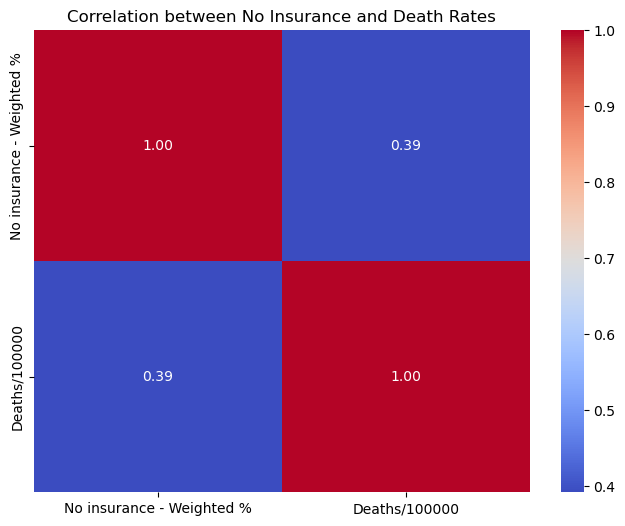

,No insurance - Weighted %,Deaths/100000
No insurance - Weighted %,1.000000,0.391782
Deaths/100000,0.391782,1.000000


In [34]:
# Extracting the relevant columns
insurance_data = data[['No insurance - Weighted %', 'Deaths/100000']].dropna()

# Calculating the correlation coefficient
insurance_correlation = insurance_data.corr()

# Plotting the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(insurance_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between No Insurance and Death Rates")
plt.show()

insurance_correlation


The positive correlation coefficient indicates a direct relationship between the lack of insurance and death rates per 100,000 individuals. In other words, as the percentage of individuals without insurance increases, the death rate also tends to increase.

In [38]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Correcting the selected columns
selected_columns = ['No insurance - Weighted %', 
                    'Began prenatal care in 1st trimester - Weighted %', 
                    'Any cigarette smoking during the 3 months before pregnancy - Weighted %',
                    'Private insurance - Weighted %']

# Dropping rows with missing values in the selected columns and the target variable
regression_data = data[selected_columns + ['Deaths/100000']].dropna()

# Defining the independent variables (X) and dependent variable (y)
X = regression_data[selected_columns]
y = regression_data['Deaths/100000']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Displaying the summary of the regression model
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Deaths/100000   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     8.426
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           4.33e-06
Time:                        14:38:45   Log-Likelihood:                -599.84
No. Observations:                 138   AIC:                             1210.
Df Residuals:                     133   BIC:                             1224.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      25.3599     70.629      0.359      0.720    -114.342     165.062
No insurance - Weighted %                                                   1.2412      0.342      3.632      0.000       0.565       1.917
Began prenatal care in 1st trimester - Weighted %                           0.2946      0.759      0.388      0.699      -1.207       1.796
Any cigarette smoking during the 3 months before pregnancy - Weighted %    -0.8246      0.331     -2.488      0.014      -1.480      -0.169
Private insurance - Weighted %                                             -0.3899      0.251     -1.553      0.123      -0.887       0.107
==============================================================================
Omnibus:                       62.945   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.179
Skew:                           1.705   Prob(JB):                     5.68e-49
Kurtosis:                       8.198   Cond. No.                     4.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
selected_columns = ['No insurance - Weighted %', 
                    'Any cigarette smoking during the 3 months before pregnancy - Weighted %',
                    'Any e-cigarette use during the 3 months before pregnancy - Weighted %',
                    'Heavy drinking (≥8 drinks a week) during the 3 months before pregnancy -Weighted %',
                    'Experienced IPV during pregnancy by a husband or partner and/or by an ex-husband or ex-partner - Weighted %',
                    'Self-reported depression during pregnancy - Weighted %',
                    'Hookah use in the last 2 years - Weighted %']

regression_data = data[selected_columns + ['Deaths/100000']].dropna()

X = regression_data[selected_columns]
y = regression_data['Deaths/100000']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Deaths/100000   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     9.836
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           8.35e-10
Time:                        18:17:46   Log-Likelihood:                -586.10
No. Observations:                 138   AIC:                             1188.
Df Residuals:                     130   BIC:                             1212.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================================================
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                          18.9663     11.741      1.615      0.109      -4.262      42.195
No insurance - Weighted %                                                                                       0.9537      0.276      3.451      0.001       0.407       1.500
Any cigarette smoking during the 3 months before pregnancy - Weighted %                                        -0.3358      0.350     -0.958      0.340      -1.029       0.357
Any e-cigarette use during the 3 months before pregnancy - Weighted %                                           2.5848      1.033      2.502      0.014       0.541       4.629
Heavy drinking (≥8 drinks a week) during the 3 months before pregnancy -Weighted %                             -2.9172      1.500     -1.945      0.054      -5.885       0.050
Experienced IPV during pregnancy by a husband or partner and/or by an ex-husband or ex-partner - Weighted %    -1.2194      2.443     -0.499      0.619      -6.053       3.615
Self-reported depression during pregnancy - Weighted %                                                         -0.9397      0.552     -1.703      0.091      -2.031       0.152
Hookah use in the last 2 years - Weighted %                                                                     3.8305      1.019      3.757      0.000       1.814       5.847
==============================================================================
Omnibus:                       89.504   Durbin-Watson:                   2.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              642.204
Skew:                           2.219   Prob(JB):                    3.52e-140
Kurtosis:                      12.591   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value of 0.346 indicates that approximately 34% of the variation in the dependent variable (in this case, the death rate per 100,000 individuals) is explained by the independent variables included in the model.

Model Summary
Dependent Variable: Deaths/100,000 individuals.
R-squared (0.346): About 34.6% of the variance in the death rates is explained by the model. This is a moderate to good level of explanatory power.
Adjusted R-squared (0.311): Adjusted for the number of predictors, it's slightly lower than R-squared but still indicates a reasonable fit.
F-statistic (9.836) and Prob (F-statistic) (8.35e-10): The model is statistically significant, meaning that the set of independent variables collectively has a significant impact on the death rate.